In [41]:
## read in libraries 
import os
import shutil
import numpy as np
import random 
import tensorflow as tf

## libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## tensorflow libraries for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.preprocessing import image 


In [37]:
# set seed for reproducibility
seed_value = 2024
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

In [15]:
## classification/labels for data
classification = ["Control", "Very Mild Dementia", "Mild Dementia", "Moderate Dementia"]

## setting color theme for visuals 
category_colors = sns.color_palette("viridis", n_colors=len(classification))

In [28]:
# paths/ directories
train_dir = "../Organized_Data/train/" # original train dataset
output_path = "../Organized_Data/augmented_train/" #output path for new augmented train dataset

## uncomment to copy the original train dataset to the augmented_train path
#shutil.copytree(train_dir, output_path) 

'../Organized_Data/augmented_train/'

### Visualizing the distribution of MRIs per classification category in the original train data

In [17]:
# P1 : identifying the count of images per class
train_counts = {}
for category in classification:
    category_dir = os.path.join(train_dir, category)
    # List all jpg files in the category directory
    images = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
    train_counts[category] = len(images)

print("Train Set Distribution by Category:")
for category, count in train_counts.items():
    print(f"{category}: {count}")

Train Set Distribution by Category:
Control: 17751
Very Mild Dementia: 10980
Mild Dementia: 3782
Moderate Dementia: 244


/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


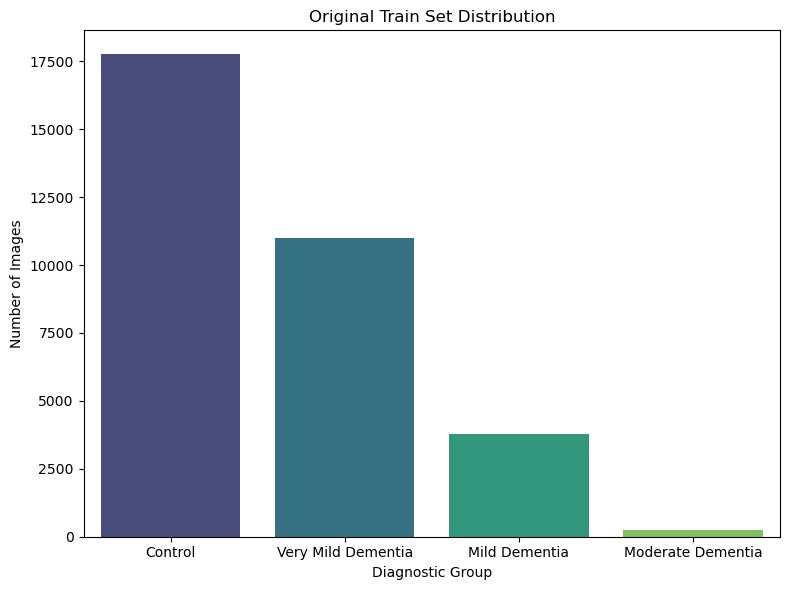

In [18]:
categories = list(train_counts.keys())
counts = list(train_counts.values())

# Visualize Original Data Distribution (bar chart) 

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette=category_colors)
plt.title('Original Train Set Distribution')
plt.xlabel('Diagnostic Group')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.savefig('../Output/Visuals/plot1a_original_train_distribution_bar.png')
plt.show()

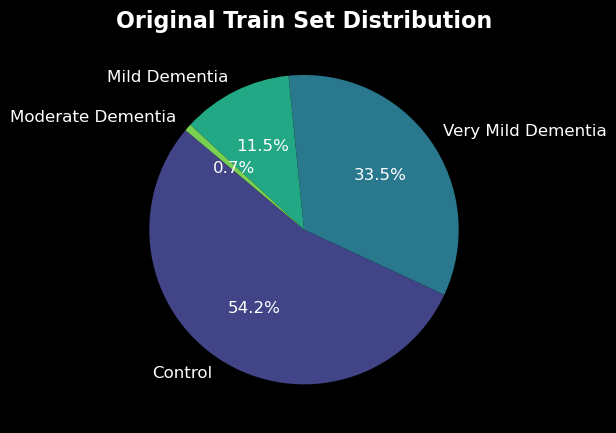

In [19]:
plt.figure(figsize=(6, 6), facecolor='black')
plt.pie(counts, labels=categories, colors=category_colors, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color':'white'})
plt.title('Original Train Set Distribution', fontsize=16, fontweight='bold', color = 'white')
plt.tight_layout()
plt.savefig('../Output/Visuals/plot2a_original_train_distribution_pie.png')
plt.show()

#### Identifying how many images need to be augmented for each underrepresented classification category

In [25]:
max_count /2

8875.5

In [21]:
# identify Less-Represented Classes
max_count = max(train_counts.values()) # max_count = 17751 for control class

## decided to augment classes that have less than half of a max_count images (control) 
## augmenting all other classes so they at least meet 50% of the max_count (control)

threshold = int(max_count / 2) ## 8875 threshold
augmentation_needed = {cat: count for cat, count in train_counts.items() if count < threshold}

print("Augmentation needed for:", augmentation_needed)

Augmentation needed for: {'Mild Dementia': 3782, 'Moderate Dementia': 244}


#### Data Augmentation Time for Underrepresented Classes

Augmentation needed for:
((previously))
{'Very Mild Dementia': 2928, 'Mild Dementia': 1220, 'Moderate Dementia': 244} to at least have a 50% representation of the most represented class of the maximum

Augmentation needed for: {'Mild Dementia': 3782, 'Moderate Dementia': 244}

In [29]:
aug_gen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
for category, current_count in augmentation_needed.items():
    ## path to the augmented category directory to add in the new images
    category_dir = os.path.join(output_path, category) 
    images = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
    images_needed = threshold - current_count

    print(f"Augmenting {category} MRIs. \n Currently {current_count}, need additional {images_needed} images to reach threshold of {threshold} (50% of control).")
    
    gen = aug_gen.flow_from_directory(
        directory = output_path,
        # originally wanted to maintain the (250, 500) size of the original files, but space is an something to be mindful of
        target_size=(250, 250), ## may change images to smaller size for faster processing
        batch_size=1,
        classes = [category],
        shuffle = True,
        save_to_dir = category_dir,
        save_prefix = "aug",
        save_format = "jpg")
    
    for image in range(images_needed):
        images, _ = next(gen)
    print(f"Augmentation complete for {category}!") 
    print(f"New count for {category}: {len(os.listdir(category_dir))}")
    print("----------------------------------------------------")
print("Augmentation complete!")

Augmenting Mild Dementia MRIs. 
 Currently 3782, need additional 5093 images to reach threshold of 8875 (50% of control).
Found 3782 images belonging to 1 classes.
Augmentation complete for Mild Dementia!
New count for Mild Dementia: 8875
----------------------------------------------------
Augmenting Moderate Dementia MRIs. 
 Currently 244, need additional 8631 images to reach threshold of 8875 (50% of control).
Found 244 images belonging to 1 classes.
Augmentation complete for Moderate Dementia!
New count for Moderate Dementia: 8875
----------------------------------------------------
Augmentation complete!


### Visualizing the distribution of MRIs per classification category for augmented train data

In [31]:
# P1b : identifying the count of images per class // augmented
augmented_train_counts = {}
for category in classification:
    category_dir = os.path.join(output_path, category)
    images = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
    augmented_train_counts[category] = len(images)

print("Updated Train Set Distribution:")
for category, count in augmented_train_counts.items():
    print(f"{category}: {count}")

Updated Train Set Distribution:
Control: 17751
Very Mild Dementia: 10980
Mild Dementia: 8875
Moderate Dementia: 8875


/Users/rosemarymejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


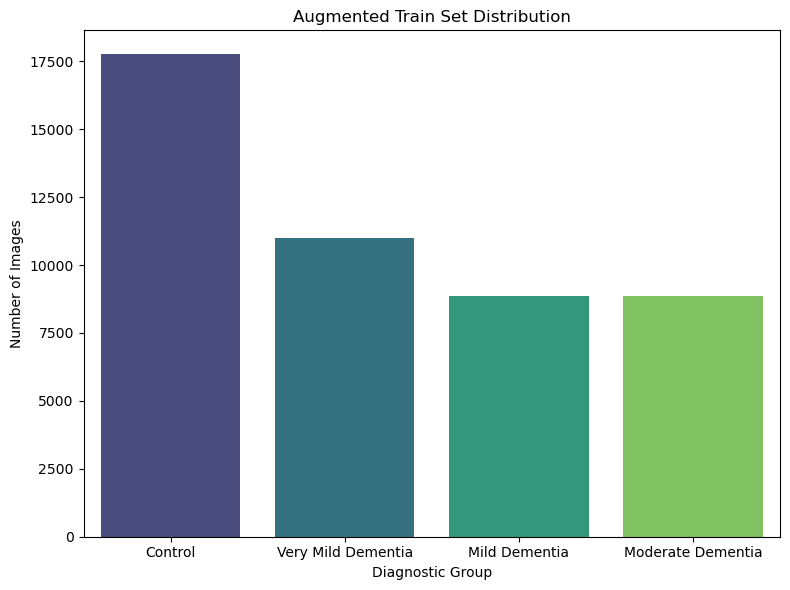

In [32]:
post_aug_counts = list(augmented_train_counts.values())

# Visualize Augmented Data Distribution (bar chart) 
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=post_aug_counts, palette=category_colors)
plt.title('Augmented Train Set Distribution')
plt.xlabel('Diagnostic Group')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.savefig('../Output/Visuals/plot1b_augmented_train_distribution_bar.png')
plt.show()

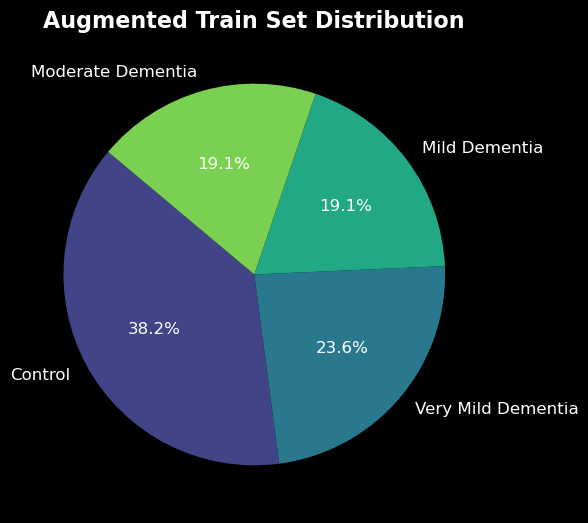

In [33]:
plt.figure(figsize=(6, 6), facecolor='black')
plt.pie(post_aug_counts, labels=categories, colors=category_colors, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color':'white'})
plt.title('Augmented Train Set Distribution', fontsize=16, fontweight='bold', color = 'white')
plt.tight_layout()
plt.savefig('../Output/Visuals/plot2b_augmented_train_distribution_pie.png')
plt.show()

### Visuals to showcase differences and augmentation changes

In [39]:
## saving paths
train_dir = "../Organized_Data/train"
output_path = "../Organized_Data/augmented_train"
classes_to_plot = ["Mild Dementia", "Moderate Dementia"]
save_dir = "../Output/Visuals/augmented_images"

# confirm directory exists
os.makedirs(save_dir, exist_ok=True)

Creating plot for Mild Dementia...


/var/folders/2d/dx_pwmc97_3__qpjy25hqkbm0000gn/T/ipykernel_12721/139732166.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 1, 1])


Saved plot for Mild Dementia to ../Output/Visuals/augmented_images/original_augmented_visual_mild_dementia.png


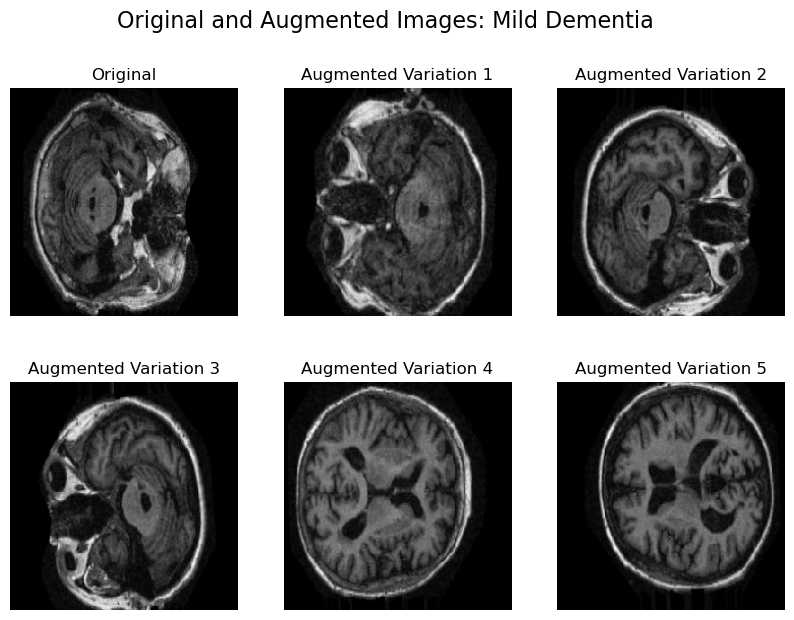

Creating plot for Moderate Dementia...
Saved plot for Moderate Dementia to ../Output/Visuals/augmented_images/original_augmented_visual_moderate_dementia.png


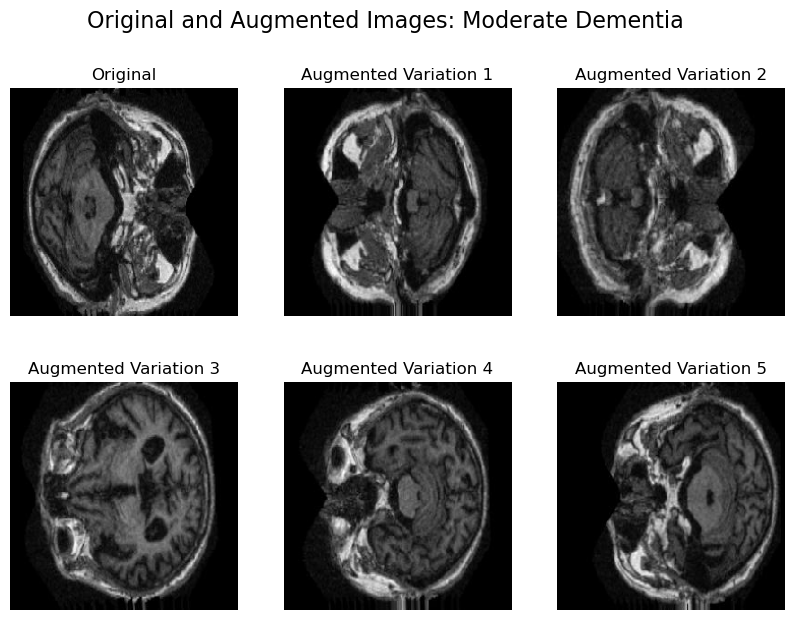

In [43]:
## creating visuals for each augmented category 
for class_name in classes_to_plot:
    print(f"Creating plot for {class_name}...")

    # random original image
    class_dir = os.path.join(train_dir, class_name)
    sample_image_name = random.choice([f for f in os.listdir(class_dir) if f.endswith('.jpg')])
    sample_image_path = os.path.join(class_dir, sample_image_name)

    # random augmented images
    augmented_image_dir = os.path.join(output_path, class_name)
    augmented_images = [
        random.choice([f for f in os.listdir(augmented_image_dir) if f.startswith('aug') and f.endswith('.jpg')])
        for _ in range(5)
    ]
    
    # creating the structure for the plot to showcase original and augmented images
    plt.figure(figsize=(10, 7))
    plt.suptitle(f"Original and Augmented Images: {class_name}", fontsize=16)

    #showcase original random image
    ax = plt.subplot(2, 3, 1)
    original_image = load_img(sample_image_path, target_size=(224, 224))
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis("off")

    #includign augmented images in subplot 
    for i, img_name in enumerate(augmented_images):
        img_path = os.path.join(augmented_image_dir, img_name)
        aug_img = load_img(img_path, target_size=(224, 224))
        ax = plt.subplot(2, 3, i + 2)
        plt.imshow(aug_img)
        plt.title(f"Augmented Variation {i+1}")
        plt.axis("off")

    plt.tight_layout(rect=[1, 1, 1, 1])

    # saving plot to output visual file path
    save_path = os.path.join(save_dir, f"original_augmented_visual_{class_name.replace(' ', '_').lower()}.png")
    plt.savefig(save_path, dpi=300)
    print(f"Saved plot for {class_name} to {save_path}")

    plt.show()